# Código para a variável independente DEC

# Tratamento dos Dados

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import random
import time

In [2]:
df = pd.read_excel('AtributosConjuntos_Vfinal_2.xlsx')

print(df)

      ID CONJUNTO  DIST                       NOME           T01          T02  \
0             964    69                   PEDREIRA    117.901536     0.000000   
1            2142    88                SIDERÓPOLIS    262.575384     0.000000   
2            2922    69                 JAGUARIUNA    161.175144     0.000000   
3            4536    83                     Forcel    227.891228     0.000000   
4            5273    86                  URUSSANGA    255.300910     0.000000   
...           ...   ...                        ...           ...          ...   
3056        16717    32        CONJ_BERNARDO_SAYAO   4781.173152   598.362212   
3057        16718    32                CONJ_PARANA  13150.115595    11.156815   
3058        16719    32  CONJ_PARAISO_I_NAO_URBANO  16919.943701  1058.633147   
3059        16720    32              CONJ_ALVORADA  14635.651923   391.643653   
3060        16721    32     CONJ_GURUPI_NAO_URBANO   7012.198467   223.703590   

             T03        T04

In [3]:
#Essa função ajuda a entender a estrutura da base dados.
df.head()

,ID CONJUNTO,DIST,NOME,T01,T02,T03,T04,T05,T06,T07,...,SE158,SE159,SE160,SE161,SE162,SE163,SE164,SE165,DEC,FEC
0,964,69,PEDREIRA,117.901536,0.0,0.052702,0.000000,0.0,8.157338,0.069188,...,185.378476,993.387389,4180.361719,5197.702506,1254.521493,662.963736,357.873230,218.061475,5.51,2.755
1,2142,88,SIDERÓPOLIS,262.575384,0.0,4.893834,37.271785,0.0,49.657270,0.189116,...,73.000000,335.000000,1211.000000,1588.000000,457.000000,197.000000,91.000000,52.000000,2.57,2.360
2,2922,69,JAGUARIUNA,161.175144,0.0,0.328161,10.276213,0.0,66.557519,0.412952,...,176.507072,1085.191847,3470.604453,4703.435610,1623.779164,1144.147548,852.674166,430.977462,4.96,3.340
3,4536,83,Forcel,227.891228,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,495.978151,1146.095606,2440.007484,1821.965113,491.748189,277.590777,150.517504,127.157774,0.30,0.620
4,5273,86,URUSSANGA,255.300910,0.0,0.000000,56.077966,0.0,173.203290,0.678428,...,68.166893,404.256382,1901.273085,2628.549973,765.892586,407.453150,213.662955,53.083650,4.18,3.765


In [4]:
#Essa função nos ajudará a ver quais entradas possuem dados faltantes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Columns: 283 entries, ID CONJUNTO to FEC
dtypes: float64(267), int64(15), object(1)
memory usage: 6.6+ MB


In [5]:
#describe() serve para entregar as estatísticas dos dados.
df.describe()

,ID CONJUNTO,DIST,T01,T02,T03,T04,T05,T06,T07,T08,...,SE158,SE159,SE160,SE161,SE162,SE163,SE164,SE165,DEC,FEC
count,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,...,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000
mean,14758.127736,1954.248938,2756.543404,243.717656,44.899910,27.916428,9.268016,285.780244,0.271205,384.300740,...,9408.502783,27497.366228,56782.950281,57206.641097,22617.783893,20867.647466,28008.147487,11219.024301,15.150127,6.775707
std,1308.661113,2466.506938,14750.466260,2755.814989,231.734745,108.461692,159.697858,484.271068,0.449567,4619.576935,...,21811.934992,71994.202693,159042.242674,171860.730024,69090.881091,64678.311713,91640.034548,36890.122340,15.490673,5.728576
min,964.000000,26.000000,0.135852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,32.000000,111.000000,47.000000,7.000000,4.000000,3.089343,6.278046,0.010000,0.005000
25%,13704.000000,63.000000,96.038401,0.000000,0.000000,0.000000,0.000000,22.001410,0.091102,0.000000,...,544.196972,1248.000000,1831.034008,852.802851,200.224544,121.883016,74.823950,241.609114,5.990000,3.430000
50%,14856.000000,385.000000,641.028173,0.000000,1.270928,0.000000,0.000000,126.201415,0.187217,0.000000,...,1690.997764,2816.786881,4635.177957,3317.829864,892.491874,562.232469,372.513399,634.250376,10.090000,5.160000
75%,15896.000000,4950.000000,1989.702632,32.135371,14.442636,26.640053,0.000000,336.385468,0.302142,0.000000,...,4737.250859,10950.383651,23380.813993,22456.802143,7302.894954,5162.179927,3899.683589,2972.626132,17.995000,8.075000
max,16721.000000,7019.000000,472227.107905,111357.022216,7196.038526,3225.024917,7189.601530,5004.296194,9.120013,172424.120591,...,102249.000000,363890.000000,826887.000000,915173.000000,362806.000000,333099.000000,467277.000000,202464.000000,136.300000,69.455000


In [6]:
target_columns = ['ID CONJUNTO', 'DIST', 'NOME', 'DEC', 'FEC']
feature_names = [col for col in df.columns if col not in target_columns]

print(feature_names)

['T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'BDGD01', 'BDGD02', 'BDGD03', 'BDGD04', 'BDGD05', 'BDGD06', 'BDGD07', 'BDGD08', 'BDGD09', 'BDGD10', 'BDGD11', 'BDGD12', 'BDGD13', 'BDGD14', 'BDGD15', 'BDGD16', 'BDGD17', 'BDGD18', 'BDGD19', 'BDGD20', 'BDGD21', 'BDGD22', 'BDGD23', 'BDGD24', 'BDGD25', 'BDGD26', 'BDGD27', 'BDGD28', 'BDGD29', 'BDGD30', 'BDGD31', 'BDGD32', 'BDGD33', 'BDGD34', 'BDGD35', 'BDGD36', 'BDGD37', 'BDGD38', 'BDGD39', 'BDGD40', 'BDGD41', 'BDGD42', 'BDGD43', 'BDGD44', 'BDGD45', 'BDGD46', 'BDGD47', 'BDGD48', 'BDGD49', 'BDGD50', 'BDGD51', 'BDGD52', 'BDGD53', 'BDGD54', 'BDGD55', 'BDGD56', 'BDGD57', 'BDGD58', 'BDGD59', 'BDGD60', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'SE001', 'SE002', 'SE003', '

In [7]:
#Separando os dados de entrada e saída em diferentes dataframes.
inputs, DEC, FEC = df.iloc[:, 3:281], df.iloc[:, 281], df.iloc[:, 282]

print(inputs)
print(DEC)
print(FEC)

               T01          T02         T03        T04       T05         T06  \
0       117.901536     0.000000    0.052702   0.000000   0.00000    8.157338   
1       262.575384     0.000000    4.893834  37.271785   0.00000   49.657270   
2       161.175144     0.000000    0.328161  10.276213   0.00000   66.557519   
3       227.891228     0.000000    0.000000   0.000000   0.00000    0.000000   
4       255.300910     0.000000    0.000000  56.077966   0.00000  173.203290   
...            ...          ...         ...        ...       ...         ...   
3056   4781.173152   598.362212  123.414622  12.529034   0.00000  315.883554   
3057  13150.115595    11.156815  193.203604  15.201067  74.74256  310.824086   
3058  16919.943701  1058.633147  255.687376   0.000000   0.00000  720.944533   
3059  14635.651923   391.643653   34.115447  24.749975   0.00000  597.874800   
3060   7012.198467   223.703590   43.867183   0.000000   0.00000  260.487623   

           T07          T08           T

In [8]:
#Essa parte do código preenche os valores de atributos vazios pela média da coluna do atributo. A vantagem de fazer isso é que
#a média nem o desvio padrão dos dados são alterados.
inputs = inputs.fillna(inputs.mean())

inputs.describe()

,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,...,SE156,SE157,SE158,SE159,SE160,SE161,SE162,SE163,SE164,SE165
count,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,...,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000
mean,2756.543404,243.717656,44.899910,27.916428,9.268016,285.780244,0.271205,384.300740,472.647846,1289.877798,...,13320.650117,11219.024301,9408.502783,27497.366228,56782.950281,57206.641097,22617.783893,20867.647466,28008.147487,11219.024301
std,14750.466260,2755.814989,231.734745,108.461692,159.697858,484.271068,0.449567,4619.576935,5099.576624,13580.733334,...,43638.567850,36890.122340,21811.934992,71994.202693,159042.242674,171860.730024,69090.881091,64678.311713,91640.034548,36890.122340
min,0.135852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.008708,6.278046,11.000000,32.000000,111.000000,47.000000,7.000000,4.000000,3.089343,6.278046
25%,96.038401,0.000000,0.000000,0.000000,0.000000,22.001410,0.091102,0.000000,0.000000,0.000000,...,29.597028,241.609114,544.196972,1248.000000,1831.034008,852.802851,200.224544,121.883016,74.823950,241.609114
50%,641.028173,0.000000,1.270928,0.000000,0.000000,126.201415,0.187217,0.000000,0.216285,19.586551,...,143.467013,634.250376,1690.997764,2816.786881,4635.177957,3317.829864,892.491874,562.232469,372.513399,634.250376
75%,1989.702632,32.135371,14.442636,26.640053,0.000000,336.385468,0.302142,0.000000,41.648045,223.833309,...,1616.880161,2972.626132,4737.250859,10950.383651,23380.813993,22456.802143,7302.894954,5162.179927,3899.683589,2972.626132
max,472227.107905,111357.022216,7196.038526,3225.024917,7189.601530,5004.296194,9.120013,172424.120591,180665.101277,445798.158788,...,226082.000000,202464.000000,102249.000000,363890.000000,826887.000000,915173.000000,362806.000000,333099.000000,467277.000000,202464.000000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(inputs, DEC, test_size = 0.25, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2295, 278) (766, 278) (2295,) (766,)


In [10]:
#Aqui está sendo chamado um módulo para poder normalizar os dados. Foi escolhido o uso do MinMaxScaler, que nós dá valores no intervalo [0, 1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
count,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,...,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000
mean,0.005766,0.002236,0.006452,0.008686,0.001804,0.066321,0.030251,0.003943,0.002518,0.002784,...,0.059066,0.055508,0.092478,0.075835,0.068732,0.062560,0.062418,0.062732,0.060019,0.055508
std,0.030119,0.026481,0.033907,0.035980,0.024517,0.114095,0.048070,0.041488,0.027101,0.029654,...,0.192659,0.181929,0.213804,0.197677,0.191923,0.187304,0.189865,0.193553,0.195557,0.181929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000194,0.000000,0.000000,0.000000,0.000000,0.005052,0.009973,0.000000,0.000000,0.000000,...,0.000124,0.001160,0.005199,0.003305,0.002040,0.000868,0.000528,0.000346,0.000150,0.001160
50%,0.001347,0.000000,0.000172,0.000000,0.000000,0.028853,0.020416,0.000000,0.000001,0.000045,...,0.000641,0.003093,0.016644,0.007741,0.005502,0.003686,0.002530,0.001684,0.000792,0.003093
75%,0.004165,0.000297,0.002116,0.007967,0.000000,0.077363,0.033017,0.000000,0.000236,0.000489,...,0.007784,0.015162,0.047299,0.030833,0.028745,0.025353,0.020561,0.016191,0.008716,0.015162
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelo Multi-Layer Perceptron Regression

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

#Logistic, (150,100,50)
MLP = MLPRegressor(activation = 'logistic', hidden_layer_sizes = (150,100,50,), max_iter=50000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 476.70357709997916
4.585208327419571 65.30722943490761 0.6530095449374557


In [14]:
#Tanh, (150,100,50)
MLP = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (150,100,50,), max_iter=50000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 331.9441272999975
4.362551519648345 66.35908424433882 0.647420828617036


In [15]:
#Identity, (150,100,50)
MLP = MLPRegressor(activation = 'identity', hidden_layer_sizes = (150,100,50,), max_iter=50000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 58.741256800014526
5.861917628362654 85.91677582226727 0.5435068766806384


In [16]:
#Relu, (150,100,50)
MLP = MLPRegressor(activation = 'relu', hidden_layer_sizes = (150,100,50,), max_iter=50000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 211.2559770999942
3.972648417769432 67.6984380129651 0.6403045724584651


In [17]:
#Logistic (100,75,50)
MLP = MLPRegressor(activation = 'logistic', hidden_layer_sizes = (100,75,50,), max_iter=50000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 605.8887309000129
4.423473276040906 63.98703402755422 0.6600240088663782


In [18]:
#Tanh (100,75,50)
MLP = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (100,75,50,), max_iter=50000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 271.0809160999779
4.3242282625956685 64.2218046603038 0.6587766252398183


In [19]:
#Identity (100,75,50)
MLP = MLPRegressor(activation = 'identity', hidden_layer_sizes = (100,75,50,), max_iter=50000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 55.12232049999875
5.850343097518927 87.37808654499688 0.5357426386773539


In [20]:
#Relu (100,75,50)
MLP = MLPRegressor(activation = 'relu', hidden_layer_sizes = (100,75,50,), max_iter=50000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 161.83957530002226
3.9711398167060707 60.545310416628595 0.678310579163238


# Modelo Decision Tree Regression

In [21]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=5, random_state=42)

start_time = time.perf_counter()
DTR.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, DTR.predict(X_test))
MSE = metrics.mean_squared_error(y_test, DTR.predict(X_test))
Rsquared = metrics.r2_score(y_test, DTR.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 0.46089729998493567
5.676922122162541 95.61252789561938 0.49199139434863515


In [22]:
DTR = DecisionTreeRegressor(max_depth=4, random_state=42)

start_time = time.perf_counter()
DTR.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, DTR.predict(X_test))
MSE = metrics.mean_squared_error(y_test, DTR.predict(X_test))
Rsquared = metrics.r2_score(y_test, DTR.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 0.37842630001250654
5.830037026463394 93.3802173368038 0.5038521096683133


In [23]:
DTR = DecisionTreeRegressor(max_depth=3, random_state=42)

start_time = time.perf_counter()
DTR.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, DTR.predict(X_test))
MSE = metrics.mean_squared_error(y_test, DTR.predict(X_test))
Rsquared = metrics.r2_score(y_test, DTR.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 0.25831500001368113
5.9104115151287155 92.4896129862984 0.5085840698438796


In [24]:
# Acesse as importâncias das características
importances = DTR.feature_importances_

# Associe as importâncias às características
feature_importance_dict = dict(zip(feature_names, importances))

# Imprima as importâncias das características
for feature, importance in feature_importance_dict.items():
    if importance != 0:
        print(f"{feature}: {importance*100} %")

T03: 1.8895284888582873 %
BDGD03: 10.489124712128147 %
BDGD04: 64.30785057588022 %
BDGD34: 7.6008072782742016 %
SE020: 1.6021776345722167 %
SE026: 3.246624155018244 %
SE028: 10.863887155268676 %


In [25]:
DTR = DecisionTreeRegressor(criterion='absolute_error', max_depth=3, random_state=42)

start_time = time.perf_counter()
DTR.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, DTR.predict(X_test))
MSE = metrics.mean_squared_error(y_test, DTR.predict(X_test))
Rsquared = metrics.r2_score(y_test, DTR.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 6.49962289998075
5.603919712793735 89.58280271703654 0.5240285378888295


In [26]:
DTR = DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=42)

start_time = time.perf_counter()
DTR.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, DTR.predict(X_test))
MSE = metrics.mean_squared_error(y_test, DTR.predict(X_test))
Rsquared = metrics.r2_score(y_test, DTR.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 7.660688800009666
5.334516971279373 89.10955904046997 0.5265429767971739


In [27]:
DTR = DecisionTreeRegressor(criterion='absolute_error', max_depth=4, random_state=42)

start_time = time.perf_counter()
DTR.fit(X_train, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, DTR.predict(X_test))
MSE = metrics.mean_squared_error(y_test, DTR.predict(X_test))
Rsquared = metrics.r2_score(y_test, DTR.predict(X_test))

print(MAE, MSE, Rsquared)

Tempo de treino: 7.010271000006469
5.285326370757179 82.07775921997388 0.5639043446079857


In [28]:
# Acesse as importâncias das características
importances = DTR.feature_importances_

# Associe as importâncias às características
feature_importance_dict = dict(zip(feature_names, importances))

# Imprima as importâncias das características
for feature, importance in feature_importance_dict.items():
    if importance != 0:
        print(f"{feature}: {importance*100} %")

T10: 2.0748839251587334 %
BDGD03: 6.490020379740129 %
BDGD04: 41.60365096455175 %
BDGD06: 3.694381545699658 %
BDGD29: 4.4280959351523315 %
BDGD48: 0.7999881888278539 %
BDGD58: 3.6424342607108535 %
C21: 1.3308894414135775 %
C28: 1.4090837756599162 %
C30: 3.3226030292375546 %
SE020: 3.042689185176778 %
SE026: 4.990931097668107 %
SE091: 21.79095646981542 %
SE121: 1.3793918011873552 %


# Modelo Forward Stepwise Regression

In [29]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
SFS = SequentialFeatureSelector(direction='forward', estimator=LR, tol=0.01, scoring='r2')

start_time = time.perf_counter()
SFS.fit(X_train, y_train)

# Obtendo a máscara de características selecionadas
selected_features_mask = SFS.get_support()

# Usando a máscara para obter os nomes das características selecionadas
selected_features = np.array(feature_names)[selected_features_mask]

# Imprimindo os nomes das características selecionadas
print("Características selecionadas:", selected_features)

X_train_selected = SFS.transform(X_train)
X_test_selected = SFS.transform(X_test)

print(X_train_selected.shape)
print(X_test_selected.shape)

#Agora está sendo treinada uma regressão linear utilizando as características selecionadas pela SequencialFeatureSelector
LR.fit(X_train_selected, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, LR.predict(X_test_selected))
MSE = metrics.mean_squared_error(y_test, LR.predict(X_test_selected))
Rsquared = metrics.r2_score(y_test, LR.predict(X_test_selected))

print(MAE, MSE, Rsquared)

Características selecionadas: ['BDGD03' 'BDGD20' 'BDGD48' 'C04' 'SE024' 'SE094']
(2295, 6)
(766, 6)
Tempo de treino: 15.482962300011422
6.296070345498705 100.08881689850635 0.46820796988639657


In [30]:
LR = LinearRegression()
SFS = SequentialFeatureSelector(direction='forward', estimator=LR, tol=0.0001, scoring='r2')

start_time = time.perf_counter()
SFS.fit(X_train, y_train)

# Obtendo a máscara de características selecionadas
selected_features_mask = SFS.get_support()

# Usando a máscara para obter os nomes das características selecionadas
selected_features = np.array(feature_names)[selected_features_mask]

# Imprimindo os nomes das características selecionadas
print("Características selecionadas:", selected_features)

X_train_selected = SFS.transform(X_train)
X_test_selected = SFS.transform(X_test)

print(X_train_selected.shape)
print(X_test_selected.shape)

#Agora está sendo treinada uma regressão linear utilizando as características selecionadas pela SequencialFeatureSelector
LR.fit(X_train_selected, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, LR.predict(X_test_selected))
MSE = metrics.mean_squared_error(y_test, LR.predict(X_test_selected))
Rsquared = metrics.r2_score(y_test, LR.predict(X_test_selected))

print(MAE, MSE, Rsquared)

Características selecionadas: ['T02' 'T07' 'T10' 'T12' 'T14' 'BDGD02' 'BDGD03' 'BDGD04' 'BDGD07'
 'BDGD11' 'BDGD12' 'BDGD13' 'BDGD15' 'BDGD17' 'BDGD19' 'BDGD20' 'BDGD21'
 'BDGD23' 'BDGD24' 'BDGD25' 'BDGD26' 'BDGD28' 'BDGD29' 'BDGD31' 'BDGD34'
 'BDGD35' 'BDGD36' 'BDGD40' 'BDGD42' 'BDGD48' 'BDGD50' 'BDGD56' 'BDGD57'
 'BDGD58' 'BDGD59' 'C01' 'C03' 'C04' 'C06' 'C07' 'C09' 'C13' 'C14' 'C21'
 'C24' 'C25' 'C29' 'C33' 'C35' 'C36' 'SE008' 'SE020' 'SE022' 'SE023'
 'SE024' 'SE028' 'SE030' 'SE032' 'SE033' 'SE035' 'SE038' 'SE041' 'SE042'
 'SE043' 'SE046' 'SE051' 'SE055' 'SE061' 'SE073' 'SE074' 'SE091' 'SE094'
 'SE097' 'SE106' 'SE123' 'SE127' 'SE128' 'SE133' 'SE141' 'SE142' 'SE150'
 'SE160']
(2295, 82)
(766, 82)
Tempo de treino: 351.31954389999737
6.012192762453856 85.42094936350023 0.5461413024562886


In [31]:
LR = LinearRegression()
SFS = SequentialFeatureSelector(direction='forward', estimator=LR, tol=0.001, scoring='r2')

start_time = time.perf_counter()
SFS.fit(X_train, y_train)

# Obtendo a máscara de características selecionadas
selected_features_mask = SFS.get_support()

# Usando a máscara para obter os nomes das características selecionadas
selected_features = np.array(feature_names)[selected_features_mask]

# Imprimindo os nomes das características selecionadas
print("Características selecionadas:", selected_features)

X_train_selected = SFS.transform(X_train)
X_test_selected = SFS.transform(X_test)

print(X_train_selected.shape)
print(X_test_selected.shape)

#Agora está sendo treinada uma regressão linear utilizando as características selecionadas pela SequencialFeatureSelector
LR.fit(X_train_selected, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, LR.predict(X_test_selected))
MSE = metrics.mean_squared_error(y_test, LR.predict(X_test_selected))
Rsquared = metrics.r2_score(y_test, LR.predict(X_test_selected))

print(MAE, MSE, Rsquared)

Características selecionadas: ['T10' 'T12' 'T14' 'BDGD02' 'BDGD03' 'BDGD07' 'BDGD17' 'BDGD19' 'BDGD20'
 'BDGD21' 'BDGD25' 'BDGD26' 'BDGD28' 'BDGD29' 'BDGD35' 'BDGD36' 'BDGD40'
 'BDGD42' 'BDGD48' 'BDGD50' 'BDGD57' 'C04' 'C13' 'SE022' 'SE023' 'SE024'
 'SE030' 'SE032' 'SE033' 'SE035' 'SE091' 'SE094' 'SE127']
(2295, 33)
(766, 33)
Tempo de treino: 104.9089392000169
5.92477772275233 90.18529272101982 0.5208273872281487


# Modelos com PCA (Principal Component Analysis)

In [32]:
#Para esses testes, usaremos os modelos com melhores parâmetros.

from sklearn import decomposition
PCA = decomposition.PCA(n_components=10)
X_train_PCA = PCA.fit_transform(X_train)
X_test_PCA = PCA.fit_transform(X_test)

In [33]:
#Relu (5,2)
MLP = MLPRegressor(activation = 'relu', hidden_layer_sizes = (5,2,), max_iter=500000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train_PCA, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test_PCA))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test_PCA))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test_PCA))

print(MAE, MSE, Rsquared)

Tempo de treino: 227.80271200000425
6.261913751643674 105.11752667653681 0.4414894226542646


In [34]:
DTR = DecisionTreeRegressor(criterion='absolute_error', max_depth=4, random_state=42)

start_time = time.perf_counter()
DTR.fit(X_train_PCA, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, DTR.predict(X_test_PCA))
MSE = metrics.mean_squared_error(y_test, DTR.predict(X_test_PCA))
Rsquared = metrics.r2_score(y_test, DTR.predict(X_test_PCA))

print(MAE, MSE, Rsquared)

Tempo de treino: 0.2758009000099264
5.875890992167101 111.8700045447128 0.40561214859820494


In [35]:
LR = LinearRegression()
SFS = SequentialFeatureSelector(direction='forward', estimator=LR, tol=0.0001, scoring='r2')

start_time = time.perf_counter()
SFS.fit(X_train_PCA, y_train)

X_train_selected = SFS.transform(X_train_PCA)
X_test_selected = SFS.transform(X_test_PCA)

print(X_train_selected.shape)
print(X_test_selected.shape)

#Agora está sendo treinada uma regressão linear utilizando as características selecionadas pela SequencialFeatureSelector
LR.fit(X_train_selected, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, LR.predict(X_test_selected))
MSE = metrics.mean_squared_error(y_test, LR.predict(X_test_selected))
Rsquared = metrics.r2_score(y_test, LR.predict(X_test_selected))

print(MAE, MSE, Rsquared)

(2295, 9)
(766, 9)
Tempo de treino: 0.46779049999895506
6.665393960098822 106.50687285371329 0.43410754676656715


In [36]:
#Para esses testes, usaremos os modelos com melhores parâmetros.

from sklearn import decomposition
PCA = decomposition.PCA(n_components=20)
X_train_PCA = PCA.fit_transform(X_train)
X_test_PCA = PCA.fit_transform(X_test)

In [37]:
#Relu (10,5,2)
MLP = MLPRegressor(activation = 'relu', hidden_layer_sizes = (10,5,2,), max_iter=500000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train_PCA, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test_PCA))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test_PCA))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test_PCA))

print(MAE, MSE, Rsquared)

Tempo de treino: 406.25047509997967
9.408926195207918 267.25012684670577 -0.4199537161883329


In [38]:
DTR = DecisionTreeRegressor(criterion='absolute_error', max_depth=4, random_state=42)

start_time = time.perf_counter()
DTR.fit(X_train_PCA, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, DTR.predict(X_test_PCA))
MSE = metrics.mean_squared_error(y_test, DTR.predict(X_test_PCA))
Rsquared = metrics.r2_score(y_test, DTR.predict(X_test_PCA))

print(MAE, MSE, Rsquared)

Tempo de treino: 0.3895852000277955
6.029676892950392 121.13991795855092 0.35635923277723813


In [39]:
LR = LinearRegression()
SFS = SequentialFeatureSelector(direction='forward', estimator=LR, tol=0.0001, scoring='r2')

start_time = time.perf_counter()
SFS.fit(X_train_PCA, y_train)

X_train_selected = SFS.transform(X_train_PCA)
X_test_selected = SFS.transform(X_test_PCA)

print(X_train_selected.shape)
print(X_test_selected.shape)

#Agora está sendo treinada uma regressão linear utilizando as características selecionadas pela SequencialFeatureSelector
LR.fit(X_train_selected, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, LR.predict(X_test_selected))
MSE = metrics.mean_squared_error(y_test, LR.predict(X_test_selected))
Rsquared = metrics.r2_score(y_test, LR.predict(X_test_selected))

print(MAE, MSE, Rsquared)

(2295, 17)
(766, 17)
Tempo de treino: 1.4668164000031538
7.301955526098438 117.35498716359672 0.3764693319237715


In [40]:
#Para esses testes, usaremos os modelos com melhores parâmetros.

from sklearn import decomposition
PCA = decomposition.PCA(n_components=40)
X_train_PCA = PCA.fit_transform(X_train)
X_test_PCA = PCA.fit_transform(X_test)

In [41]:
#Relu (20,10,5)
MLP = MLPRegressor(activation = 'relu', hidden_layer_sizes = (20,10,5,), max_iter=500000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train_PCA, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test_PCA))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test_PCA))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test_PCA))

print(MAE, MSE, Rsquared)

Tempo de treino: 334.7017066000262
11.329592811859117 399.60663505326966 -1.1231904850802112


In [42]:
DTR = DecisionTreeRegressor(criterion='absolute_error', max_depth=4, random_state=42)

start_time = time.perf_counter()
DTR.fit(X_train_PCA, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, DTR.predict(X_test_PCA))
MSE = metrics.mean_squared_error(y_test, DTR.predict(X_test_PCA))
Rsquared = metrics.r2_score(y_test, DTR.predict(X_test_PCA))

print(MAE, MSE, Rsquared)

Tempo de treino: 0.7386051999928895
6.289082898172324 144.6022423874021 0.23169918057725092


In [43]:
LR = LinearRegression()
SFS = SequentialFeatureSelector(direction='forward', estimator=LR, tol=0.0001, scoring='r2')

start_time = time.perf_counter()
SFS.fit(X_train_PCA, y_train)

X_train_selected = SFS.transform(X_train_PCA)
X_test_selected = SFS.transform(X_test_PCA)

print(X_train_selected.shape)
print(X_test_selected.shape)

#Agora está sendo treinada uma regressão linear utilizando as características selecionadas pela SequencialFeatureSelector
LR.fit(X_train_selected, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, LR.predict(X_test_selected))
MSE = metrics.mean_squared_error(y_test, LR.predict(X_test_selected))
Rsquared = metrics.r2_score(y_test, LR.predict(X_test_selected))

print(MAE, MSE, Rsquared)

(2295, 26)
(766, 26)
Tempo de treino: 5.665817800007062
7.725587769167957 128.05382131424201 0.31962427261420023


In [44]:
#Para esses testes, usaremos os modelos com melhores parâmetros.

from sklearn import decomposition
PCA = decomposition.PCA(n_components=80)
X_train_PCA = PCA.fit_transform(X_train)
X_test_PCA = PCA.fit_transform(X_test)

In [45]:
#Relu (40,20,10)
MLP = MLPRegressor(activation = 'relu', hidden_layer_sizes = (40,20,10,), max_iter=500000, random_state=42, learning_rate_init=0.00001)

start_time = time.perf_counter()
MLP.fit(X_train_PCA, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, MLP.predict(X_test_PCA))
MSE = metrics.mean_squared_error(y_test, MLP.predict(X_test_PCA))
Rsquared = metrics.r2_score(y_test, MLP.predict(X_test_PCA))

print(MAE, MSE, Rsquared)

Tempo de treino: 309.0440611000231
11.892796502546103 432.24272173556255 -1.2965925826326208


In [46]:
DTR = DecisionTreeRegressor(criterion='absolute_error', max_depth=4, random_state=42)

start_time = time.perf_counter()
DTR.fit(X_train_PCA, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, DTR.predict(X_test_PCA))
MSE = metrics.mean_squared_error(y_test, DTR.predict(X_test_PCA))
Rsquared = metrics.r2_score(y_test, DTR.predict(X_test_PCA))

print(MAE, MSE, Rsquared)

Tempo de treino: 1.4711459999962244
6.306201044386422 124.33968611292428 0.3393582205219673


In [47]:
LR = LinearRegression()
SFS = SequentialFeatureSelector(direction='forward', estimator=LR, tol=0.0001, scoring='r2')

start_time = time.perf_counter()
SFS.fit(X_train_PCA, y_train)

X_train_selected = SFS.transform(X_train_PCA)
X_test_selected = SFS.transform(X_test_PCA)

print(X_train_selected.shape)
print(X_test_selected.shape)

#Agora está sendo treinada uma regressão linear utilizando as características selecionadas pela SequencialFeatureSelector
LR.fit(X_train_selected, y_train)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

MAE = metrics.mean_absolute_error(y_test, LR.predict(X_test_selected))
MSE = metrics.mean_squared_error(y_test, LR.predict(X_test_selected))
Rsquared = metrics.r2_score(y_test, LR.predict(X_test_selected))

print(MAE, MSE, Rsquared)

(2295, 51)
(766, 51)
Tempo de treino: 26.216802500013728
8.43273093919209 145.43031078426597 0.22729948651065301


# Desenhando o melhor modelo de árvore

In [48]:
DTR = DecisionTreeRegressor(criterion='absolute_error', max_depth=4, random_state=42)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4, random_state=42)

In [49]:
from sklearn import tree

print(tree.export_text(DTR))

|--- feature_20 <= 0.00
|   |--- feature_19 <= 0.02
|   |   |--- feature_45 <= 0.02
|   |   |   |--- feature_9 <= 0.00
|   |   |   |   |--- value: [17.09]
|   |   |   |--- feature_9 >  0.00
|   |   |   |   |--- value: [73.09]
|   |   |--- feature_45 >  0.02
|   |   |   |--- feature_106 <= 0.31
|   |   |   |   |--- value: [76.03]
|   |   |   |--- feature_106 >  0.31
|   |   |   |   |--- value: [34.94]
|   |--- feature_19 >  0.02
|   |   |--- feature_74 <= 0.00
|   |   |   |--- feature_104 <= 0.66
|   |   |   |   |--- value: [33.21]
|   |   |   |--- feature_104 >  0.66
|   |   |   |   |--- value: [77.27]
|   |   |--- feature_74 >  0.00
|   |   |   |--- feature_97 <= 0.69
|   |   |   |   |--- value: [14.89]
|   |   |   |--- feature_97 >  0.69
|   |   |   |   |--- value: [23.80]
|--- feature_20 >  0.00
|   |--- feature_203 <= 0.82
|   |   |--- feature_138 <= 0.21
|   |   |   |--- feature_22 <= 0.04
|   |   |   |   |--- value: [13.87]
|   |   |   |--- feature_22 >  0.04
|   |   |   |   |---

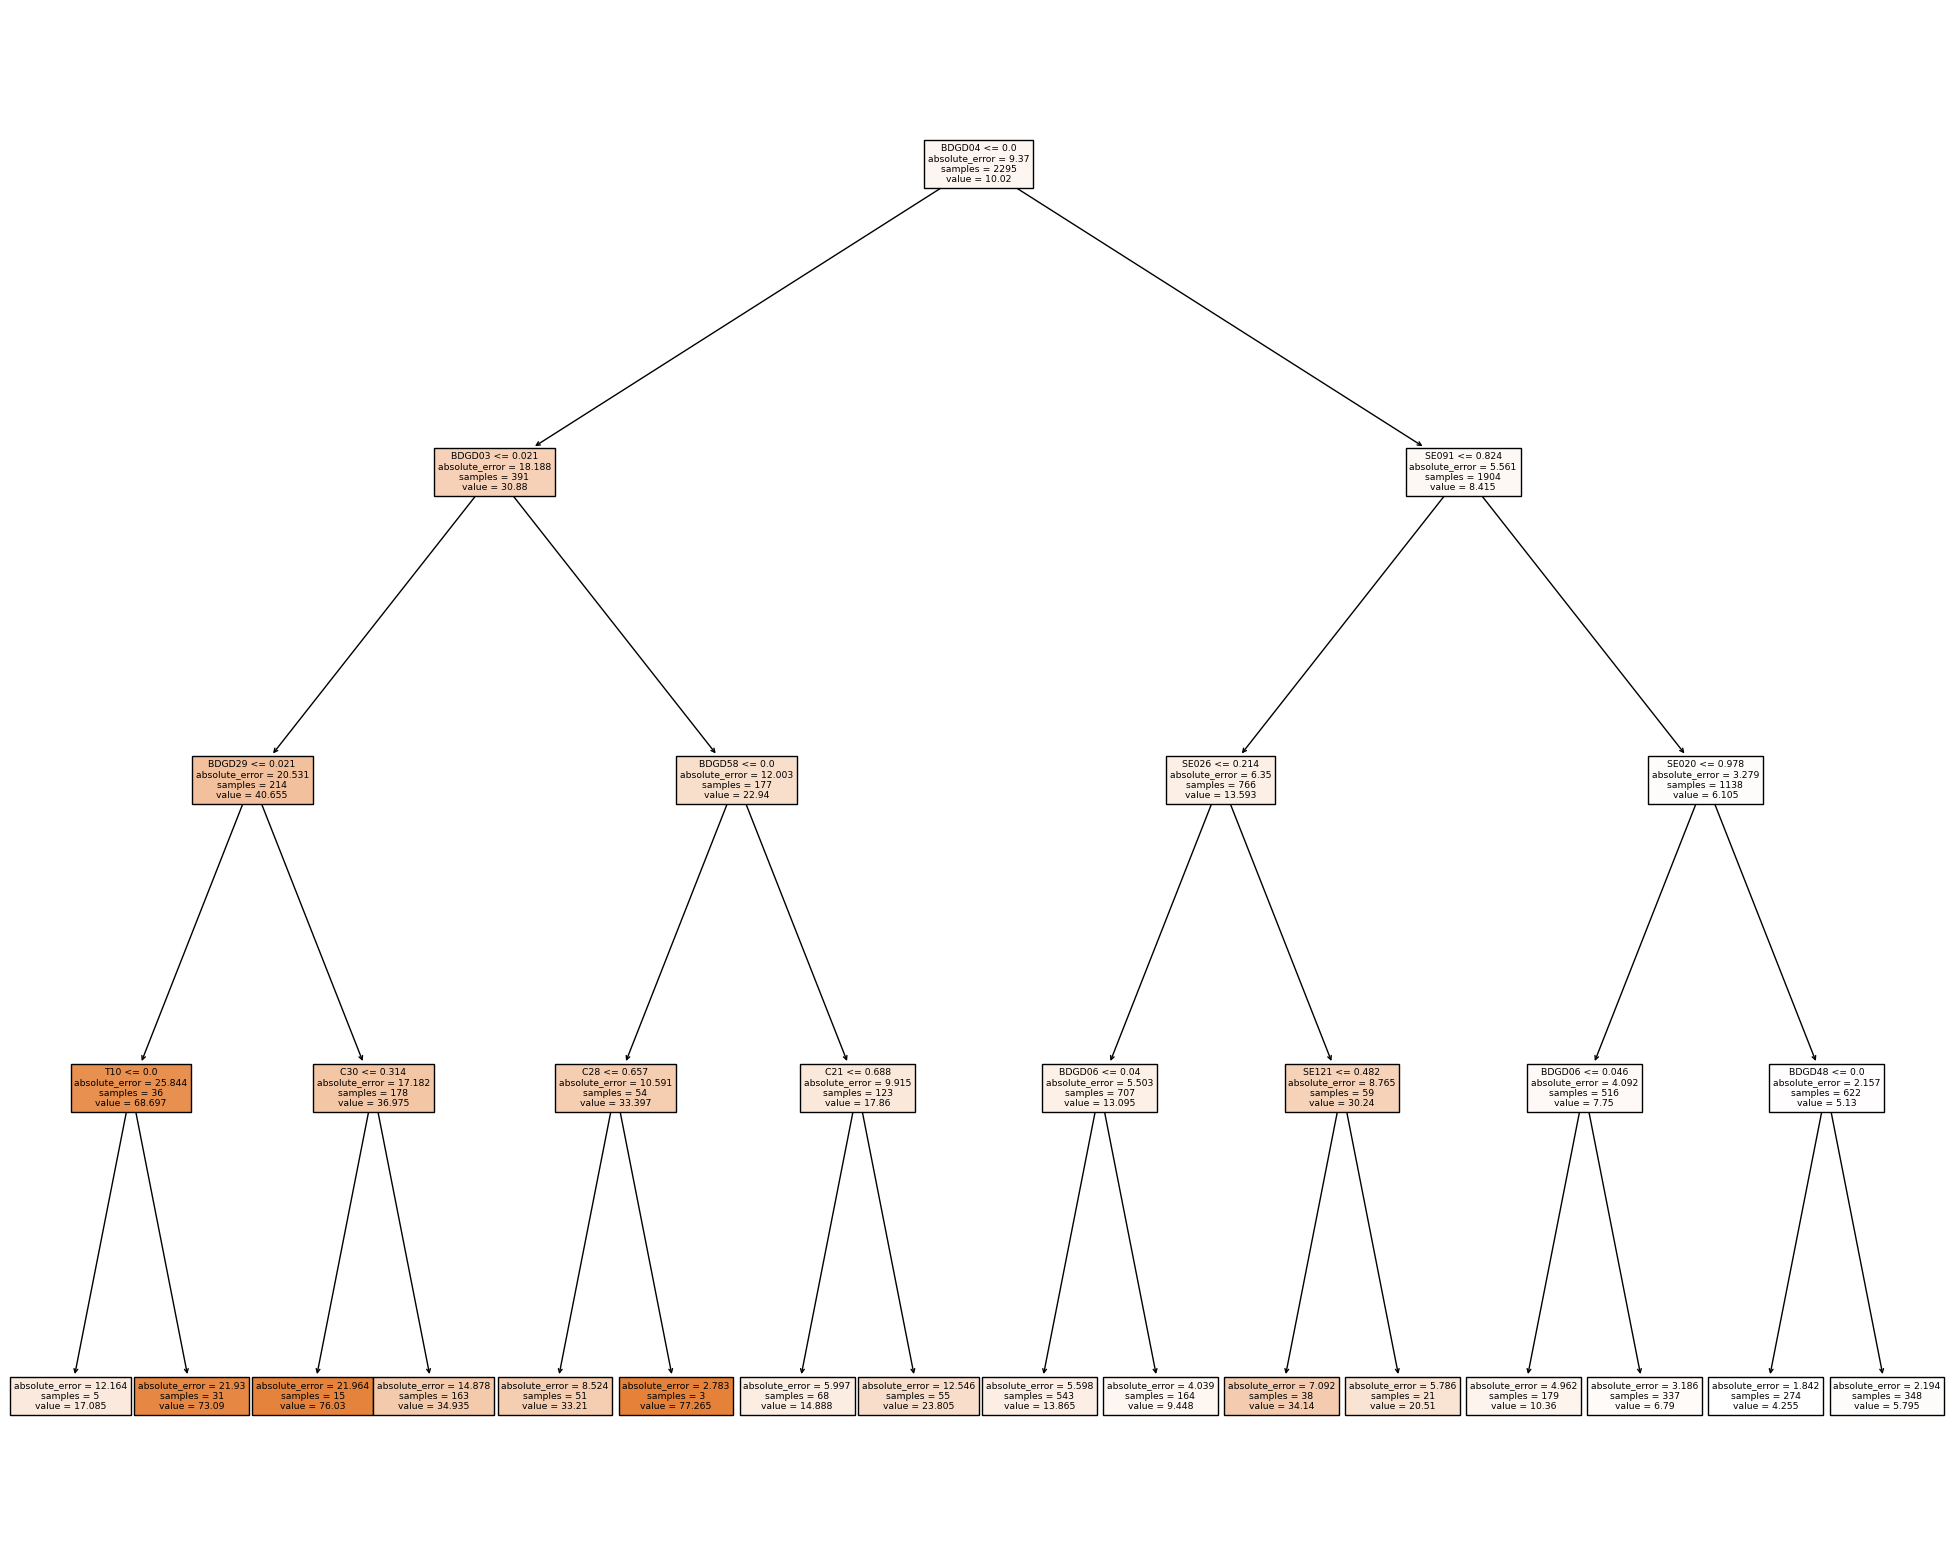

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(DTR, feature_names=feature_names, filled=True)
plt.show()

# Resultados comparativos

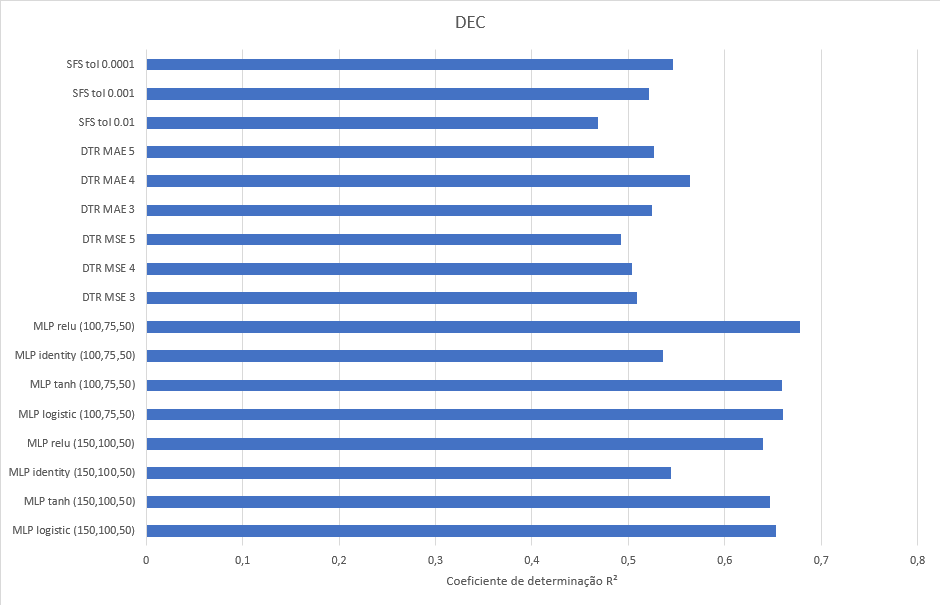

In [51]:
from IPython.display import Image, display

display(Image(filename='DEC.png'))